# Algotytm przecinania się odcinków na płaszczyźnie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer
from enum import Enum

# Przydatne funkcje 

In [2]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


In [3]:
def draw_line_segments(sections):
    vis = Visualizer()
    vis.add_line_segment(sections)
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

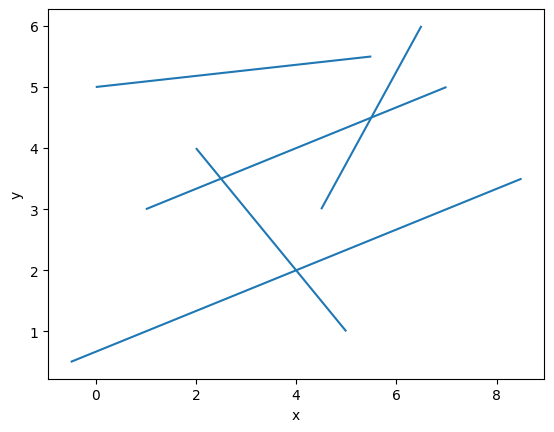

In [4]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

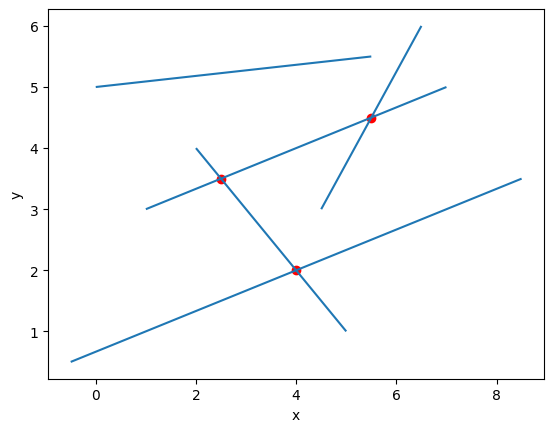

In [5]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [6]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    used_x=set()
    sections=[]
    
    while len(sections)<n:
        x1=np.random.uniform(0,max_x)
        if x1 in used_x: 
            continue
        used_x.add(x1)
        y1=np.random.uniform(0,max_y)
        point1=(x1,y1)
        x2=np.random.uniform(0,max_x)
        if x2 in used_x: 
            continue
        used_x.add(x2)
        y2=np.random.uniform(0,max_y)
        point2=(x2,y2)
        if x1<x2:
            left,right=point1,point2
        else:
            left,right=point2,point1
        sections.append((left,right))
    return sections



In [7]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.174s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [8]:
generated_sections = generate_uniform_sections(1000, 1000, 20)

Zwizualizuj otrzymane odcinki

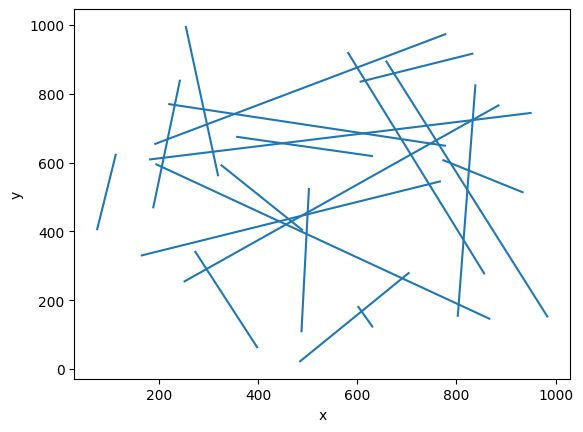

In [9]:
draw_line_segments(generated_sections)

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką

In [4]:
%matplotlib tk

interactive_sections=[]
used_x=set()
active=True
current_points=[]

def draw_point(point):
    """
    Funkcja rysuje punkt o współrzędnych przekazanych w argumencie.
    :param point: punkt reprezentowany przez krotkę współrzędnych x, y odczytanych z kliknięcia myszki
    """
    plt.scatter(point[0],point[1],color="red")
    plt.show()

def draw_line(points):
    """
    Funkcja rysuje odcinek między dwoma wskazanymi punktami.
    :param points: tablica punktów (krotek współrzędnych), które są końcami odcinka
    """
    ax=plt.gca()
    x=[points[0][0],points[1][0]]
    y=[points[0][1],points[1][1]]
    line=ax.plot(x,y,color="red") 
    ax.figure.canvas.draw()        

def onclick(event):
    """
    Funkcja obsługuje zdarzenie kliknięcia myszką, dodając końce odcinka
    w kliknięte miejsca lub kończąc wprowadzanie odcinków
    :param event: zdarzenie kliknięcia myszką, które przechowuje m. in. informacje 
    o klikniętym punkcie oraz to, który przycisk myszy został kliknięty
    """
    global active
    global current_points

    if event.dblclick and active:
        if event.button==1:
            x=event.xdata
            y=event.ydata
            if x in used_x:
                ax.set_title("Współrzędne x-owe punktów nie mogą się powtarzać!")
                plt.pause(1.5)
                ax.set_title("Kliknij dwukrotnie, aby dodać punkt.\nKażda kolejna para punktów stworzy odcinek")
            else:
                used_x.add(x)
                current_points.append((x,y))
                draw_point((x,y))
                if len(current_points)==2:
                    draw_line(current_points)
                    interactive_sections.append((current_points[0],current_points[1]))
                    current_points=[]
        elif event.button==3:
            if len(interactive_sections)<2:
                ax.set_title("Dodaj co najmniej dwa odcinki!")
                plt.pause(1.5)
                ax.set_title("Kliknij dwukrotnie, aby dodać punkt.\nKażda kolejna para punktów stworzy odcinek")
            else:
                active=False
                plt.pause(0.5)
                plt.pause(2)
                plt.close()

fig,ax=plt.subplots()
connection_id=fig.canvas.mpl_connect("button_press_event",onclick)
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.aspect=1
plt.tight_layout()
plt.ion()
plt.show()

[((np.float64(1.7496365459550385), np.float64(5.002375988329506)), (np.float64(6.365251544380665), np.float64(8.869719267407353))), ((np.float64(4.249024488908379), np.float64(3.9929750695764836)), (np.float64(3.264595747226285), np.float64(8.067063115145913))), ((np.float64(2.8991192083982025), np.float64(4.8807614198050455)), (np.float64(3.252806181457637), np.float64(5.087506186296629))), ((np.float64(4.154707962759196), np.float64(6.048261277639868)), (np.float64(4.921029737721305), np.float64(6.546881008590156))), ((np.float64(5.852405433444484), np.float64(7.227922592327134)), (np.float64(6.713043734555776), np.float64(7.446828815671164))), ((np.float64(4.850292343109419), np.float64(8.577844302948646)), (np.float64(5.57535063788126), np.float64(5.67125611521404)))]


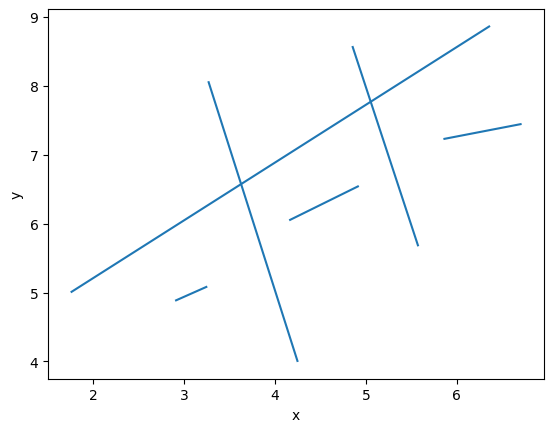

In [5]:
%matplotlib inline
draw_line_segments(interactive_sections)
print(interactive_sections)

Funkcje/Struktury pomocnicze:

In [10]:
# > 0 jeżeli a->b->c tworzy skręt w lewo
def orient(a, b, c):
    return (
        a[0]*b[1]
        + b[0]*c[1]
        + a[1]*c[0]
        - b[1]*c[0]
        - c[1]*a[0]
        - a[1]*b[0]
    )

def are_intersecting(s1, s2):
    a, b = s1
    c, d = s2

    return (
        np.sign(orient(a, b, c)) != np.sign(orient(a, b, d))
        and np.sign(orient(c, d, a)) != np.sign(orient(c, d, b))
    )

def section_to_line(s):
    (x1, y1), (x2, y2) = s
    
    a = (y1 - y2)/(x1 - x2)
    b = y1 - x1 * a
    return a, b
    
def intersection(s1, s2):
    a, b = section_to_line(s1)
    c, d = section_to_line(s2)
    
    x = (d - b) / (a - c)
    
    return (x, a * x + b)
    

In [11]:
# struktura stanu i zdarzeń - drzewo czerwono-czarne

class RBNodeColor(Enum):
    BLACK = 0
    RED = 1

class RBNode:
    def __init__(self, parent, val, color):
        if val is None:
            self.val = None
            self.color = RBNodeColor.BLACK
            self.parent = parent
            self.children = None
            return
        
        self.val = val
        self.color = color
        self.parent = parent
        self.children = [RBNode(self, None, None), RBNode(self, None, None)]
    def left(self):
        return self.children[0]
    def right(self):
        return self.children[1]
    def reverse_color(self):
        self.color = RBNodeColor.RED if self.color == RBNodeColor.BLACK else RBNodeColor.BLACK
    def is_none(self):
        return self.val is None

class RBTree:
    def __init__(self, lt=lambda a, b: a < b, eq=lambda a, b: a == b):
        self.size = 0
        self.root = None
        self.lt = lt
        self.eq = eq
        
    def find(self, val):
        if self.root == None:
            return None
        
        curr = self.root
        while not curr.is_none():
            if self.eq(val, curr.val): 
                return curr
            
            if self.lt(val, curr.val):
                curr = curr.left()
            else:
                curr = curr.right()
        return None
        
    def insert(self, val):
        if self.root == None:
            self.root = RBNode(None, val, RBNodeColor.BLACK)
            self.size = 1
            return
        
        curr = self.root
        while True:
            next_child = 0 if self.lt(val, curr.val) else 1
            
            if curr.children[next_child].is_none():
                curr.children[next_child] = RBNode(curr, val, RBNodeColor.RED)
                inserted = curr.children[next_child]
                self.size += 1
                break
            
            curr = curr.children[next_child]
        
        self.repair_redred(inserted)

    def remove(self, val):
        self.size -= 1
        node = self.find(val)
        self.remove_node(node)

    def minimum(self):
        curr = self.root
        while not curr.left().is_none():
            curr = curr.left()
        return curr.val
    
    def contains(self, val):
        return self.find(val) is not None
    
    def next(self, val):
        n = self.next_node(self.find(val))
        return None if n == None else n.val
        
    def previous(self, val):
        p = self.previous_node(self.find(val))
        return None if p == None else p.val
    
    def neighbors(self, val):
        return (self.previous(val), self.next(val))

    def pop_min(self):
        val = self.minimum()
        self.remove(val)
        return val

    # util functions

    def next_node(self, node):
        if not node.right().is_none():
            return self.successor_node(node)
        
        curr = node
        parent = curr.parent
        while parent != None:
            if parent.left() == curr:
                break
            curr = parent
            parent = curr.parent
        return parent
        
    def previous_node(self, node):
        if not node.left().is_none():
            return self.predecessor_node(node)
        
        curr = node
        parent = curr.parent
        while parent != None:
            if parent.right() == curr:
                break
            curr = parent
            parent = curr.parent
        return parent

    def remove_node(self, todel):
        if todel.left().is_none() and todel.right().is_none():
            self.remove_leaf(todel)
        elif todel.left().is_none() or todel.right().is_none():
            self.remove_single_child(todel)
        else:
            replacement = self.successor_node(todel)

            tmp = replacement.val
            replacement.val = todel.val
            todel.val = tmp
            self.remove_node(replacement)

    def remove_leaf(self, todel):
        if todel == self.root:
            self.root = None
            return
        
        parent = todel.parent
        if todel.color == RBNodeColor.BLACK:
            self.repair_double_black(todel)
        else:
            sibling = parent.left() if todel != parent.left() else parent.right()
            if not sibling.is_none():
                sibling.color = RBNodeColor.RED
        
        if todel == parent.left():
            parent.children[0] = RBNode(parent, None, None)
        else:
            parent.children[1] = RBNode(parent, None, None)
    
    def remove_single_child(self, todel):
        replacement = todel.left() if not todel.left().is_none() else todel.right()
        parent = todel.parent
        is_double_black = todel.color == RBNodeColor.BLACK and replacement.color == RBNodeColor.BLACK
        if todel == self.root:
            todel.val = replacement.val
            todel.children[0] = RBNode(parent, None, None)
            todel.children[1] = RBNode(parent, None, None)
            return
        
        if todel == parent.left():
            parent.children[0] = replacement
        else:
            parent.children[1] = replacement
            
        replacement.parent = parent
        if is_double_black:
            self.repair_double_black(replacement)
        else:
            replacement.color = RBNodeColor.BLACK

    def repair_double_black(self, start):
        if start == self.root:
            return
        
        parent = start.parent
        sibling = parent.left() if start != parent.left() else parent.right()
        if sibling.is_none():
            self.repair_double_black(parent)
            return
        
        if sibling.color == RBNodeColor.RED:
            parent.color = RBNodeColor.RED
            sibling.color = RBNodeColor.BLACK
            
            if sibling == parent.left():
                self.rotate_right(parent)
            else:
                self.rotate_left(parent)
            self.repair_double_black(start)
            return
        
        if sibling.left().color == RBNodeColor.RED or sibling.right().color == RBNodeColor.RED:
            if not sibling.left().is_none() and sibling.left().color == RBNodeColor.RED:
                if sibling == parent.left():
                    sibling.left().color = sibling.color
                    sibling.color = parent.color
                    self.rotate_right(parent)
                else:
                    sibling.left().color = parent.color
                    self.rotate_right(sibling)
                    self.rotate_left(parent)
            else:
                if sibling == parent.left():
                    sibling.right().color = parent.color
                    self.rotate_left(sibling)
                    self.rotate_right(parent)
                else:
                    sibling.right().color = sibling.color
                    sibling.color = parent.color
                    self.rotate_left(parent)
        else:
            sibling.color = RBNodeColor.RED
            if parent.color == RBNodeColor.BLACK:
                self.repair_double_black(parent)
            else:
                parent.color = RBNodeColor.BLACK

    def repair_redred(self, start):
        curr = start
        while curr != self.root and curr.parent.color == RBNodeColor.RED:
            parent = curr.parent
            grandparent = parent.parent
            uncle, uncle_position = (grandparent.left(), 0) if grandparent.left() != parent else (grandparent.right(), 1)
    
            if uncle.color == RBNodeColor.RED:
                parent.color = RBNodeColor.BLACK
                uncle.color = RBNodeColor.BLACK
                grandparent.color = RBNodeColor.RED
                
                curr = grandparent
                if grandparent == self.root:
                    grandparent.color = RBNodeColor.BLACK
                    break
            elif curr == parent.right():
                if uncle_position == 1:
                    self.rotate_left(parent)
                    curr = parent
                else:
                    self.rotate_left(grandparent)
                    grandparent.reverse_color()
                    parent.reverse_color()
                    break
            else:
                if uncle_position == 1:
                    self.rotate_right(grandparent)
                    grandparent.reverse_color()
                    parent.reverse_color()
                    break
                else:
                    self.rotate_right(parent)
                    curr = parent

    def rotate_left(self, pivot):
        upper = pivot.parent
        
        right = pivot.right()

        pivot.children[1] = right.left()
        right.left().parent = pivot
        
        right.children[0] = pivot
        pivot.parent = right
        
        if upper == None:
            self.root = right
            right.parent = None
            return
        
        if pivot == upper.left():
            upper.children[0] = right
            right.parent = upper
        else:
            upper.children[1] = right
            right.parent = upper
        
    def rotate_right(self, pivot):
        upper = pivot.parent
        
        left = pivot.left()
        
        pivot.children[0] = left.right()
        left.right().parent = pivot
        
        left.children[1] = pivot
        pivot.parent = left
        
        if upper == None:
            self.root = left
            left.parent = None
            return
        
        if pivot == upper.left():
            upper.children[0] = left
            left.parent = upper
        else:
            upper.children[1] = left
            left.parent = upper
    
    def successor_node(self, node):
        curr = node.right()
        while not curr.is_none():
            curr = curr.left()
        return curr.parent
    
    def predecessor_node(self, node):
        curr = node.left()
        while not curr.is_none():
            curr = curr.right()
        return curr.parent        
    
    def print(self):
        def print_inner(node):
            if node.is_none():
                return
            print("node:", node.val, node.color)
            print("\tleft:", node.left().val, node.left().color)
            print("\tright:", node.right().val, node.right().color)
            print_inner(node.left())
            print_inner(node.right())
        if self.root is not None:
            print_inner(self.root)


In [12]:
# typ wyliczeniowy dla typu wydarzenia
class EventType(Enum):
    START = 0
    END = 1
    INT = 2

Uzupełnij funkcję ```is_intersection```

In [13]:
def is_intersection(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    event_x = None
    
    def section_idx_cmp(si1, si2):
        s1 = sections[si1]
        s2 = sections[si2]
        
        a, b = section_to_line(s1)
        c, d = section_to_line(s2)
        
        return (a * event_x + b) < (c * event_x + d)
    
    def section_idx_eq(si1, si2):
        s1 = sections[si1]
        s2 = sections[si2]

        return np.array_equal(s1, s2)

    events = RBTree(
        lt=lambda a, b: a[0][0] < b[0][0],
        eq=lambda a, b: np.array_equal(a[0], b[0]),
    )   
    for i, (p1, p2) in enumerate(sections):
        if p1[0] < p2[0]:
            start = p1
            end = p2
        else:
            start = p2
            end = p1
        
        events.insert((start, EventType.START, i))
        events.insert((end, EventType.END, i))
        
    state = RBTree(
        lt = section_idx_cmp,
        eq = section_idx_eq
    )
    
    curr = events.minimum()
    while curr != None:
        point, event_type, section_index = curr
        event_x = point[0]
        
        if event_type == EventType.START:
            state.insert(section_index)
            for neighbor in state.neighbors(section_index):
                if neighbor == None: continue
                if are_intersecting(sections[neighbor], sections[section_index]):
                    return True
        elif event_type == EventType.END:
            neighbors = state.neighbors(section_index)
            state.remove(section_index)
            for neighbor in neighbors:
                if neighbor == None: continue
                if are_intersecting(sections[neighbor], sections[section_index]):
                    return True
        curr = events.next(curr)
    return False

In [14]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.010s


Uzupełnij funkcję ```is_intersection_with_visualization```

In [15]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    def section_idx_cmp(si1, si2):
        s1 = sections[si1]
        s2 = sections[si2]
        
        a, b = section_to_line(s1)
        c, d = section_to_line(s2)

        
        return (a * event_x + b) < (c * event_x + d)
    
    def section_idx_eq(si1, si2):
        s1 = sections[si1]
        s2 = sections[si2]

        return np.array_equal(s1, s2)
    
    n=len(sections)
    vis=Visualizer()
    vis.add_line_segment(sections)
    vis.add_point([sections[i//2][i%2] for i in range(2*n)])
    min_y=min([sections[i//2][i%2][0] for i in range(2*n)])
    max_y=max([sections[i//2][i%2][0] for i in range(2*n)])

    events = RBTree(
        lt=lambda a, b: a[0][0] < b[0][0],
        eq=lambda a, b: np.array_equal(a[0], b[0]),
    )   
    for i, (p1, p2) in enumerate(sections):
        if p1[0] < p2[0]:
            start = p1
            end = p2
        else:
            start = p2
            end = p1
        
        events.insert((start, EventType.START, i))
        events.insert((end, EventType.END, i))
        
    state = RBTree(
        lt = section_idx_cmp,
        eq = section_idx_eq
    )
    
    curr = events.minimum()
    while curr != None:
        point, event_type, section_index = curr
        event_x = point[0]
        
        broom=vis.add_line(((point[0],min_y),(point[0],max_y)),color="red")
        
        if event_type == EventType.START:
            state.insert(section_index)
            
            vis.add_point(point,color="green",s=25)
            vis.add_line_segment(sections[section_index],color="green")
            vis.add_point(sections[section_index][1],color="green",s=25)
            
            for neighbor in state.neighbors(section_index):
                if neighbor == None: continue
                
                line1 = vis.add_line_segment(sections[neighbor], color="yellow")
                line2 = vis.add_line_segment(sections[section_index], color="yellow")
                
                if are_intersecting(sections[neighbor], sections[section_index]):
                    vis.add_point(intersection(sections[neighbor], sections[section_index]), color="red")
                    return True, vis
                
                vis.remove_figure(line1)
                vis.remove_figure(line2)
        elif event_type == EventType.END:
            neighbors = state.neighbors(section_index)
            state.remove(section_index)
            
            vis.add_line_segment(sections[section_index])
            vis.add_point(sections[section_index])
            
            for neighbor in neighbors:
                if neighbor == None: continue
                
                line1 = vis.add_line_segment(sections[neighbor], color="yellow")
                line2 = vis.add_line_segment(sections[section_index], color="yellow")
                
                if are_intersecting(sections[neighbor], sections[section_index]):
                    return True, vis
                
                vis.remove_figure(line1)
                vis.remove_figure(line2)
        vis.remove_figure(broom)
        curr = events.next(curr)
    return False, vis

Uzupełnij funkcję ```find_intersections```

In [ ]:
def find_intersections(sections, eps=1e-14):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    event_x = None
    
    def section_idx_cmp(si1, si2):
        s1 = sections[si1]
        s2 = sections[si2]
        
        a, b = section_to_line(s1)
        c, d = section_to_line(s2)

        y1 = (a * event_x + b)
        y2 = (c * event_x + d)

        if y1 == y2:
            return s1[1][1] < s2[1][1]
        else:
            return y1 < y2
    
    def section_idx_eq(si1, si2):
        s1 = sections[si1]
        s2 = sections[si2]

        return np.array_equal(s1, s2)

    events = RBTree(
        lt=lambda a, b: a[0][0] < b[0][0],
        eq=lambda a, b: np.array_equal(a[0], b[0]),
    )   
    for i, (p1, p2) in enumerate(sections):
        if p1[0] < p2[0]:
            start = p1
            end = p2
        else:
            start = p2
            end = p1
        
        events.insert((start, EventType.START, i))
        events.insert((end, EventType.END, i))
        
    state = RBTree(
        lt = section_idx_cmp,
        eq = section_idx_eq
    )
    
    result = []
    curr = events.minimum()
    while curr != None:
        point, event_type, section_index = curr
        event_x = point[0]

        check_intersections = []

        # adding to state, adding new neighbors
        if event_type == EventType.START:
            state.insert(section_index)
            for neighbor in state.neighbors(section_index):
                if neighbor == None: continue
                check_intersections.append((section_index, neighbor))
        # removing from state, adding former neighbors
        elif event_type == EventType.END:
            neighbors = state.neighbors(section_index)
            state.remove(section_index)
            
            if neighbors[0] != None and neighbors[1] != None:
                check_intersections.append(neighbors)
        # switching state order, adding new neighbors
        elif event_type == EventType.INT:
            si1, si2 = section_index
            # FIXME: quick hack to make it work with my RBTree implementation
            event_x = event_x - eps
            node1 = state.find(si1)
            node2 = state.find(si2)
            
            for neighbor in state.neighbors(si1):
                if neighbor == None or neighbor == si2:
                    continue
                check_intersections.append((si2, neighbor))
            for neighbor in state.neighbors(si2):
                if neighbor == None or neighbor == si1:
                    continue
                check_intersections.append((si1, neighbor))
            
            node1.val = si2
            node2.val = si1

        # check if any new neighbors intersect
        for si1, si2 in check_intersections:
            # swap indexes to be in increasing order
            if si1 > si2:
                tmp = si1
                si1 = si2
                si2 = tmp
            
            if are_intersecting(sections[si1], sections[si2]):
                inter = (
                    intersection(sections[si1], sections[si2]),
                    EventType.INT,
                    (si1, si2)
                )
                
                # do not add intersection if it was added before
                if not events.contains(inter):
                    events.insert(inter)
                    result.append((inter[0], si1 + 1, si2 + 1))
        # go to next event
        curr = events.next(curr)
    return result

In [21]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.027s


Uzupełnij funkcję ```find_intersections_with_visualization```

In [22]:
def find_intersections_with_visualization(sections, eps=1e-14):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    event_x = None
    
    def section_idx_cmp(si1, si2):
        s1 = sections[si1]
        s2 = sections[si2]
        
        a, b = section_to_line(s1)
        c, d = section_to_line(s2)

        y1 = (a * event_x + b)
        y2 = (c * event_x + d)

        if y1 == y2:
            return s1[1][1] < s2[1][1]
        else:
            return y1 < y2
    
    def section_idx_eq(si1, si2):
        s1 = sections[si1]
        s2 = sections[si2]

        return np.array_equal(s1, s2)

    n=len(sections)
    vis=Visualizer()
    vis.add_line_segment(sections)
    vis.add_point([sections[i//2][i%2] for i in range(2*n)])
    min_y=min([sections[i//2][i%2][0] for i in range(2*n)])
    max_y=max([sections[i//2][i%2][0] for i in range(2*n)])

    events = RBTree(
        lt=lambda a, b: a[0][0] < b[0][0],
        eq=lambda a, b: np.array_equal(a[0], b[0]),
    )   
    for i, (p1, p2) in enumerate(sections):
        if p1[0] < p2[0]:
            start = p1
            end = p2
        else:
            start = p2
            end = p1
        
        events.insert((start, EventType.START, i))
        events.insert((end, EventType.END, i))
        
    state = RBTree(
        lt = section_idx_cmp,
        eq = section_idx_eq
    )
    
    result = []
    curr = events.minimum()
    while curr != None:
        point, event_type, section_index = curr
        event_x = point[0]

        check_intersections = []
        
        broom=vis.add_line(((point[0],min_y),(point[0],max_y)),color="red")

        # adding to state, adding new neighbors
        if event_type == EventType.START:
            state.insert(section_index)
            
            vis.add_point(point,color="green",s=25)
            vis.add_line_segment(sections[section_index],color="green")
            vis.add_point(sections[section_index][1],color="green",s=25)
            
            for neighbor in state.neighbors(section_index):
                if neighbor == None: continue
                check_intersections.append((section_index, neighbor))
        # removing from state, adding former neighbors
        elif event_type == EventType.END:
            neighbors = state.neighbors(section_index)
            state.remove(section_index)
            
            vis.add_line_segment(sections[section_index], color="gray")
            vis.add_point(sections[section_index], color="gray")
            
            if neighbors[0] != None and neighbors[1] != None:
                check_intersections.append(neighbors)
        # switching state order, adding new neighbors
        elif event_type == EventType.INT:
            si1, si2 = section_index
            # FIXME: quick hack to make it work with my RBTree implementation
            event_x = event_x - eps
            node1 = state.find(si1)
            node2 = state.find(si2)
            
            for neighbor in state.neighbors(si1):
                if neighbor == None or neighbor == si2:
                    continue
                check_intersections.append((si2, neighbor))
            for neighbor in state.neighbors(si2):
                if neighbor == None or neighbor == si1:
                    continue
                check_intersections.append((si1, neighbor))
            
            node1.val = si2
            node2.val = si1

        # check if any new neighbors intersect
        for si1, si2 in check_intersections:
            # swap indexes to be in increasing order
            if si1 > si2:
                tmp = si1
                si1 = si2
                si2 = tmp
            
            line1 = vis.add_line_segment(sections[si1], color="yellow")
            line2 = vis.add_line_segment(sections[si2], color="yellow")    
            
            if are_intersecting(sections[si1], sections[si2]):
                inter = (
                    intersection(sections[si1], sections[si2]),
                    EventType.INT,
                    (si1, si2)
                )
                vis.add_point(inter[0], color="red")
                
                # do not add intersection if it was added before
                if not events.contains(inter):
                    vis.add_point(inter[0], color="red")
                    events.insert(inter)
                    result.append((inter[0], si1 + 1, si2 + 1))
            
            vis.remove_figure(line1)
            vis.remove_figure(line2)
        # go to next event
        curr = events.next(curr)
        
        vis.remove_figure(broom)
    return result, vis

### Wizualizacja i wyniki działania algorytmu

Dla odcinków zadanych interaktywnie: 

[((np.float64(3.6253635018417976), np.float64(6.574014879074976)), 1, 2), ((np.float64(5.051974628373002), np.float64(7.769347452075547)), 1, 6)]


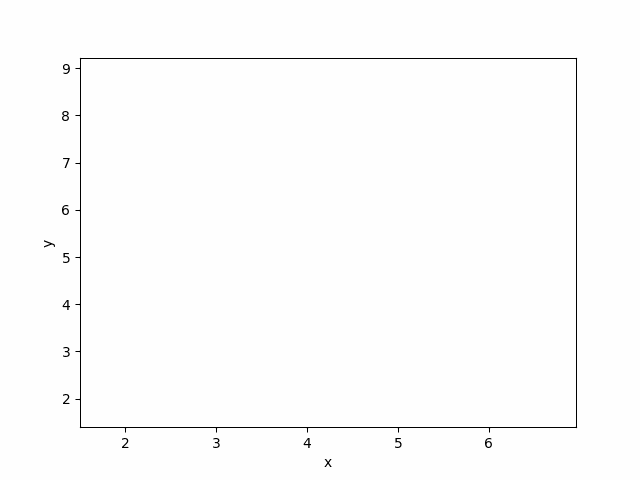

In [23]:
result, vis = find_intersections_with_visualization(interactive_sections)
print(result)
vis.show_gif()

Zbiory testowe:

In [24]:
# dużo przecięć
sections_a = [((np.float64(1.378265224242632), np.float64(3.727224716134143)), (np.float64(8.35768815928215), np.float64(6.23736000869849))), ((np.float64(1.6317408882685605), np.float64(7.330884294568104)), (np.float64(5.410296717120191), np.float64(2.869802264713649))), ((np.float64(4.484815804281336), np.float64(2.074511874990292)), (np.float64(4.384604495247829), np.float64(7.504854067320089))), ((np.float64(1.9854278613279954), np.float64(4.858028239022042)), (np.float64(7.125678536458451), np.float64(6.734416502275588))), ((np.float64(5.315980190971008), np.float64(8.362276518740584)), (np.float64(6.329882847074722), np.float64(2.894655089392504))), ((np.float64(3.91891664738624), np.float64(2.3851721834759783)), (np.float64(7.131573319342774), np.float64(5.081703661131735))), ((np.float64(4.738291468307264), np.float64(6.895959862688144)), (np.float64(7.084415056268183), np.float64(3.98817937526212))), ((np.float64(4.579132330430518), np.float64(3.2923002842541824)), (np.float64(5.203979316168853), np.float64(7.20662017117383))), ((np.float64(4.632185376389434), np.float64(5.454496031314559)), (np.float64(5.87598456498178), np.float64(3.453843644666739))), ((np.float64(6.04103848574285), np.float64(7.1196352847978375)), (np.float64(7.054941141846563), np.float64(4.522515105857501))), ((np.float64(2.8401713795549632), np.float64(6.647431615899595)), (np.float64(2.445220926305261), np.float64(2.2360552354028487))), ((np.float64(3.4650183652932984), np.float64(2.9319343264107864)), (np.float64(3.8010209896997615), np.float64(7.020223986082419)))]
# mało przecięć
sections_b = [((np.float64(1.1188947773323796), np.float64(7.933287089769006)), (np.float64(5.115557572903994), np.float64(0.9890952270223077))), ((np.float64(4.814923645803475), np.float64(2.922766866561231)), (np.float64(8.717269915225907), np.float64(8.164354769965481))), ((np.float64(3.5180714112522136), np.float64(9.198078602423395)), (np.float64(6.3593567614963415), np.float64(3.384902226954181))), ((np.float64(3.818705338352733), np.float64(4.479433343674326)), (np.float64(8.121896843909193), np.float64(6.19419875986922)))]
# brak przecięć
sections_c = [((np.float64(0.8948930277280709), np.float64(7.542133304338371)), (np.float64(3.3353331418381718), np.float64(9.083008434427375))), ((np.float64(2.3803783145776976), np.float64(4.621926404572919)), (np.float64(4.260814054677027), np.float64(6.100669472964787))), ((np.float64(2.0031122099809675), np.float64(7.069929635440129)), (np.float64(2.8932244255138784), np.float64(6.336771307413908))), ((np.float64(3.4532287995246502), np.float64(2.7455381413193747)), (np.float64(5.292401059433712), np.float64(5.901846875533948))), ((np.float64(4.048601870841366), np.float64(7.554559716677799)), (np.float64(6.506726333604439), np.float64(6.212507184019634))), ((np.float64(5.475139328847754), np.float64(2.5839947809068176)), (np.float64(6.901676786854141), np.float64(6.448609018468757))), ((np.float64(5.127347138672643), np.float64(8.536246291492567)), (np.float64(7.107994187805478), np.float64(8.08889544727318))), ((np.float64(7.290732457219519), np.float64(4.1994283850323875)), (np.float64(8.469689034084304), np.float64(3.3544323459513197))), ((np.float64(6.365251544380665), np.float64(1.9999534009537272)), (np.float64(6.9252559183914375), np.float64(4.547367930536355))), ((np.float64(1.8262687234512496), np.float64(1.341353546964072)), (np.float64(5.233453230590473), np.float64(1.1425309495332328))), ((np.float64(1.6258461053842364), np.float64(2.7455381413193747)), (np.float64(2.0384809072869103), np.float64(5.640892216405971)))]
# podwójne sprawdzenie przecięcia
sections_d = [((np.float64(0.42331039698215744), np.float64(1.0255795975796458)), (np.float64(9.177062980203173), np.float64(8.979172379079367))), ((np.float64(0.7887869358102404), np.float64(9.039979663341597)), (np.float64(9.00611427655778), np.float64(2.484954419873173))), ((np.float64(1.9087956838317843), np.float64(5.26992803908332)), (np.float64(2.9521722543571176), np.float64(5.707740485771378))), ((np.float64(6.153039360545004), np.float64(5.5009957192797945)), (np.float64(6.518515899373087), np.float64(5.513157176132241))), ((np.float64(8.452004685431332), np.float64(9.68453687652124)), (np.float64(6.636411557059565), np.float64(3.0200585213807996))), ((np.float64(7.662103778931927), np.float64(5.780709226886054)), (np.float64(8.039369883528657), np.float64(5.7442248563287155))), ((np.float64(9.000219493673455), np.float64(9.575083764849223)), (np.float64(7.715156824890842), np.float64(1.7917513792837474))), ((np.float64(8.658322086382668), np.float64(5.428026978165119)), (np.float64(9.05327253963237), np.float64(5.355058237050442)))]

[((np.float64(3.9121696297886905), np.float64(4.638538292563715)), 1, 2), ((np.float64(3.3151310772900073), np.float64(5.343420813378991)), 2, 4), ((np.float64(2.6186652898512857), np.float64(4.173332082110208)), 1, 11), ((np.float64(2.7034318386748746), np.float64(5.120127175671442)), 4, 11), ((np.float64(2.779988871933609), np.float64(5.975226557124653)), 2, 11), ((np.float64(3.595930879731826), np.float64(4.524803667970475)), 1, 12), ((np.float64(3.632422764227437), np.float64(4.968816253612845)), 2, 12), ((np.float64(3.673976038229671), np.float64(5.474412960569901)), 4, 12), ((np.float64(5.0305132074845735), np.float64(3.3181866387472105)), 2, 6), ((np.float64(4.417068402688508), np.float64(5.745670118889052)), 3, 4), ((np.float64(4.434035778960841), np.float64(4.826226393890139)), 1, 3), ((np.float64(4.449199818408912), np.float64(4.004503536308406)), 2, 3), ((np.float64(4.4705386739656605), np.float64(2.848174088230934)), 3, 6), ((np.float64(4.654188751734551), np.float64(3.7624

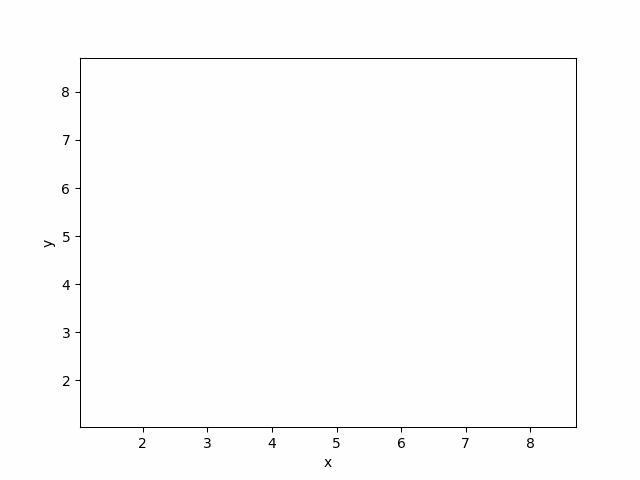

In [25]:
# Zbiór A
vis = Visualizer()
vis.add_line_segment(sections_a)
vis.save("./res/sec_a")

result, vis = find_intersections_with_visualization(sections_a)
print(result)
vis.save_gif("./res/int_a")
vis.save("./res/int_a")
vis.show_gif()

[((np.float64(5.497427100495134), np.float64(5.148381964115353)), 3, 4), ((np.float64(6.882926631364821), np.float64(5.700485368442547)), 2, 4), ((np.float64(5.883624758151053), np.float64(4.3582342587629)), 2, 3)]


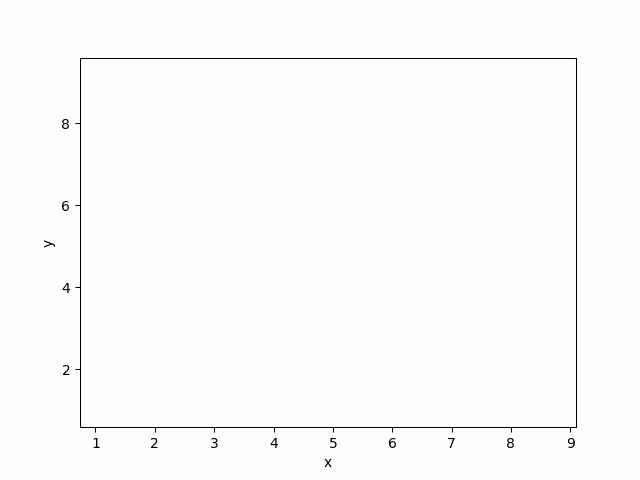

In [26]:
# Zbiór B
vis = Visualizer()
vis.add_line_segment(sections_b)
vis.save("./res/sec_b")

result, vis = find_intersections_with_visualization(sections_b)
print(result)
vis.save_gif("./res/int_b")
vis.save("./res/int_b")
vis.show_gif()

[]


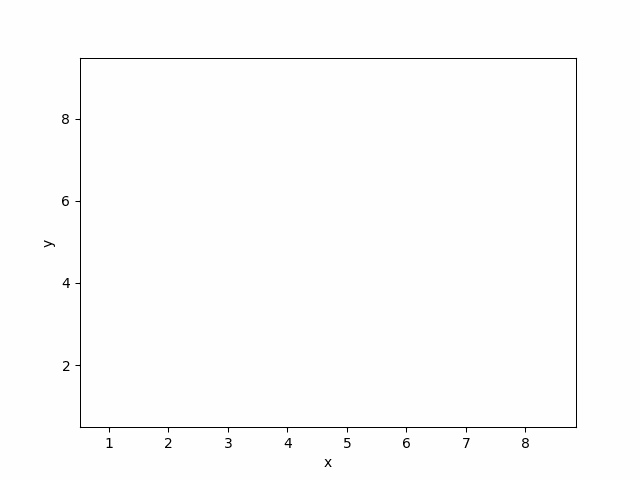

In [27]:
# Zbiór C
vis = Visualizer()
vis.add_line_segment(sections_c)
vis.save("./res/sec_c")

result, vis = find_intersections_with_visualization(sections_c)
print(result)
vis.save_gif("./res/int_c")
vis.save("./res/int_c")
vis.show_gif()

[((np.float64(5.29111981797189), np.float64(5.448434082490642)), 1, 2), ((np.float64(6.939702866615536), np.float64(4.1333467004623445)), 2, 5), ((np.float64(7.958123789961531), np.float64(7.8716535347409895)), 1, 5), ((np.float64(7.9665266813595395), np.float64(3.3142414431039136)), 2, 7), ((np.float64(8.853256879533463), np.float64(8.684964627557047)), 1, 7)]


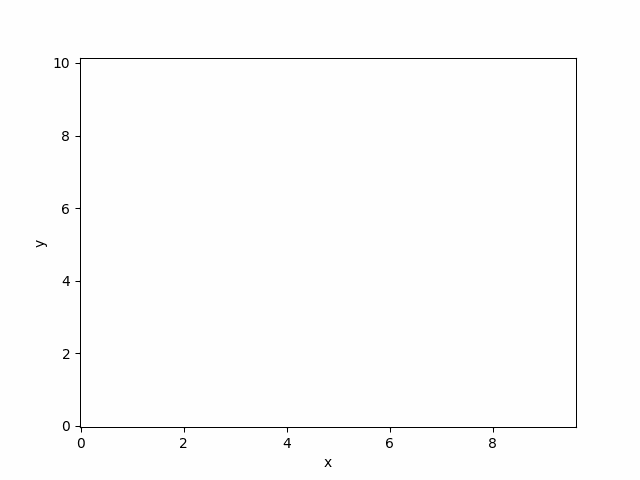

In [28]:
# Zbiór D
vis = Visualizer()
vis.add_line_segment(sections_d)
vis.save("./res/sec_d")

result, vis = find_intersections_with_visualization(sections_d)
print(result)
vis.save_gif("./res/int_d")
vis.save("./res/int_d")
vis.show_gif()

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

W moim podejściu nie było to konieczne, aczkolwiek w pierwszym algorytmie (`is_intersection`) strukturą zdarzeń może być zwykła, odpowiednio posortowana tablica. 
Jest tak, ponieważ algorytm ten nigdy nie dodaje zdarzeń przecięcia odcinków, jedynie zwracając True, jeżeli takie znajdzie.

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

W strukturze zdarzeń zamieszczany jest także typ zdarzenia: START, END lub INT.
 - START oznacza początek odcinka - dodajemy go do struktury stanu i dodajemy jego sąsiadów do sprawdzenia.
 - END oznacza koniec odcinka - usuwamy go ze struktury stany i dodajemy jego byłych sąsiadów do sprawdzenia.
 - INT oznacza przecięcie dwóch odcinków - zamieniamy ich kolejność w strukturze i dodajemy ich sąsiadów do sprawdzenia

Po przetworzeniu zdarzenia sprawdamy czy dodani do sprawdzenia sąsiedzi się przecinają, dodając odpowiednio nowe zdarzenia typu INT.

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [47]:
testing_sections = sections_d

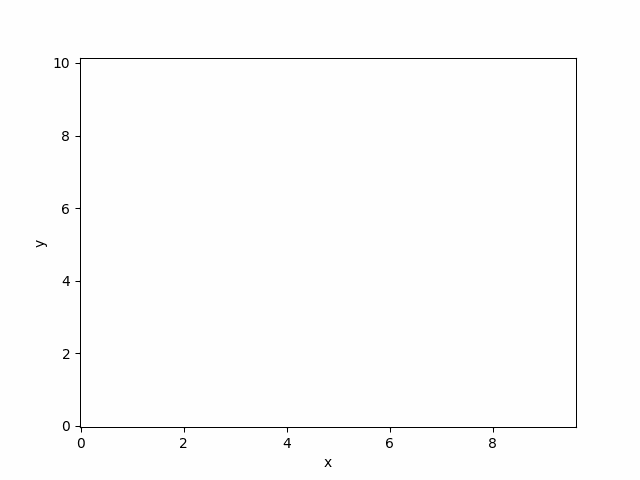

In [48]:
_, vis = find_intersections_with_visualization(testing_sections)
vis.show_gif()

Algorytm uwzględnia przypadek, w którym niektóre przecięcia mogą być dodane więcej niż raz,
poprzez sprawdzanie czy przecięcie było już kiedyś dodane do struktury zdarzeń.
Ze struktury zdarzeń nigdy nie są usuwane zdarzenia, algorytm tylko do niej dodaje lub
przechodzi do kolejnego zdarzenia.